Machine Learning Exercises

# Imports

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv, norm
from matplotlib import pyplot as plt
from math import sqrt
%matplotlib inline

# Utilities

In [2]:
def white_noise(number, variance):
    noise = np.random.normal(loc=0.0, scale=sqrt(variance), size=number)
    return noise

def create_points(number):
    x = np.linspace(start=0.0, stop=2.0, num=number)
    return x

def create_X(number, polynomial_degree, random=False):
    X = np.zeros((number, polynomial_degree + 1))
    for j in range(0, polynomial_degree + 1):
            X[:, j] = np.array(create_points(number))
            if random:
                temp = np.array(np.random.rand(number) * 2)
                X[:, j] = np.sort(temp)
            for i in range(0, number):
                X[i, j] = np.power(X[i, j], j)
    return X

def least_squares(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

def ridge_regression(X, y, lamda):
    theta = inv(X.T @ X + lamda * I) @ X.T @ y
    return theta

def mse(real, test):
    mse = np.square(real - test).mean()
    return mse

# Problem 1

## Problem 1 - Part 1

In [3]:
N = 20
variance = 0.1
theta_real = np.array([0.2, -1.0, 0.9, 0.7, 0.0, -0.2])

In [4]:
noise = white_noise(N, variance)

In [5]:
X = create_X(N, 5)

In [6]:
y = X @ theta_real.T

In [7]:
y += noise

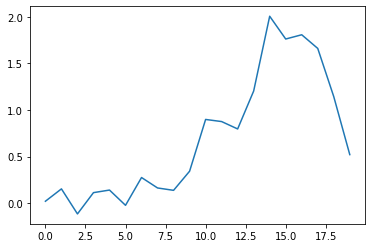

In [8]:
plt.plot(y)
plt.show()

In [9]:
theta_least_squares = least_squares(X, y)
theta_least_squares.round(3)

array([ 0.029,  0.319, -0.739, -0.217,  1.965, -0.842])

In [10]:
real_set = create_X(1000, 5)
y_real = real_set @ theta_real.T
y_real += white_noise(1000, variance)

test_set = create_X(1000, 5, random=True)
y_test = test_set @ theta_least_squares.T

In [11]:
mse_test = mse(y_real, y_test)
mse_test.round(5)

0.37989

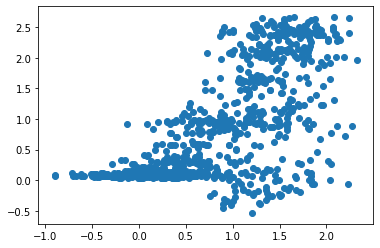

In [12]:
plt.scatter(y_real, y_test)
plt.show()

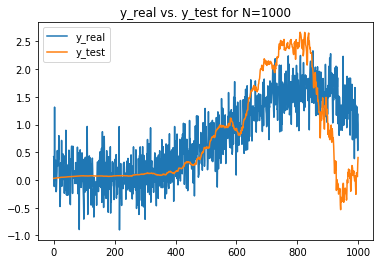

In [13]:
plt.plot(y_real, markersize=0.5, label='y_real')
plt.plot(y_test, markersize=0.5, label='y_test')
plt.title('y_real vs. y_test for N=1000')
plt.legend()
plt.show()

## Problem 1 - Part 2

In [14]:
X_2 = create_X(N, 2)
theta_least_squares_2 = least_squares(X_2, y)

X_10 = create_X(N, 10)
theta_least_squares_10 = least_squares(X_10, y)

In [15]:
theta_least_squares_2

array([-0.27483529,  1.15622308, -0.13663098])

In [16]:
theta_least_squares_10

array([ 1.96000294e-02,  1.21051067e+01, -1.95218824e+02,  1.18518196e+03,
       -3.68416438e+03,  6.64820639e+03, -7.36327482e+03,  5.07802978e+03,
       -2.12532435e+03,  4.93866223e+02, -4.88622696e+01])

In [17]:
points_exp_2 = np.zeros((100, 20))
points_exp_10 = np.zeros((100, 20))

for i in range(0, 100):
    np.random.seed(i + 2)
    noise = white_noise(N, variance)
    y_2 = X_2 @ theta_least_squares_2.T
    y_2 += noise
    y_10 = X_10 @ theta_least_squares_10.T
    y_10 += noise
    points_exp_2[i] = y_2
    points_exp_10[i] = y_10

In [18]:
means_2 = np.mean(points_exp_2, axis=0)
variance_2 = np.var(points_exp_2, axis=0)
means_10 = np.mean(points_exp_10, axis=0)
variance_10 = np.var(points_exp_10, axis=0)

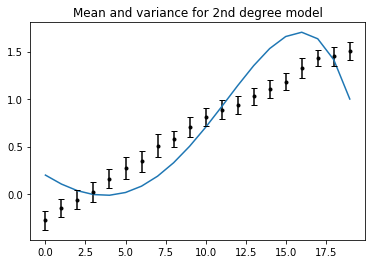

In [19]:
y_real_N = X @ theta_real.T

plt.plot(y_real_N, markersize=0.5)
plt.errorbar(range(0, 20), means_2, yerr=variance_2, fmt='.k', capsize=3)
plt.title('Mean and variance for 2nd degree model')
plt.show()

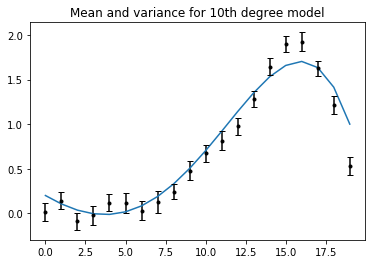

In [20]:
y_real_2 = X @ theta_real.T

plt.plot(y_real_N, markersize=0.5)
plt.errorbar(range(0, 20), means_10, yerr=variance_10, fmt='.k', capsize=3)
plt.title('Mean and variance for 10th degree model')
plt.show()

## Problem 1 - Part 3

In [21]:
I = np.identity(6)
lamda_tests = np.array([0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10])
lamda_mse = np.zeros(10)

In [22]:
for lamda in lamda_tests:
    theta_ridge = ridge_regression(X, y, lamda)
    y_ridge = test_set @ theta_ridge.T
    mse_ridge = mse(y_real, y_ridge)
    lamda_mse[np.where(lamda_tests == lamda)] = mse_ridge

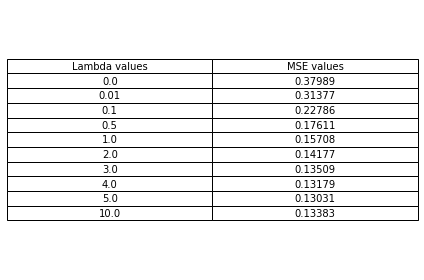

In [23]:
df = pd.DataFrame(np.column_stack((lamda_tests, lamda_mse.round(5))), 
                  columns=['Lambda values', 'MSE values'])

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
fig.tight_layout()
plt.show()

In [24]:
lamda_mse

array([0.37988839, 0.31376941, 0.22786237, 0.17611438, 0.15708208,
       0.14177495, 0.13508823, 0.13179322, 0.1303078 , 0.1338335 ])

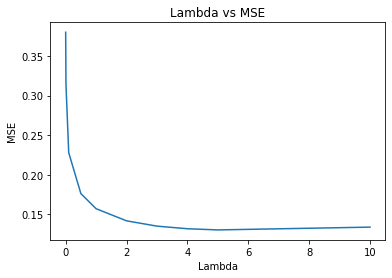

In [25]:
plt.plot(lamda_tests, lamda_mse)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Lambda vs MSE')
plt.show()

## Problem 1 - Part 4

In [26]:
def bayesian_inference(sigma_theta, sigma_heta, theta_prior, number):
    
    # Create matrix X2
    x = np.sort(np.random.rand(number) * 2)
    X = np.array([np.ones(number), x, x ** 2, x ** 3, x ** 5])
    
    # Create matrix PHI
    phi = np.linspace(start=0.0, stop=2.0, num=number)
    PHI = np.array([np.ones(number), phi, phi ** 2, phi ** 3, phi ** 5])
    
    # Set constants
    I = np.identity(5)
    noise = white_noise(number, sigma_heta)
    theta_real = np.array([0.2, -1.0, 0.9, 0.7, -0.2])
    y_real_N = PHI.T @ theta_real
    y = y_real_N + noise
    
    # Perform Bayesian inference
    sigma_theta_posterior = inv((1 / sigma_theta) * I + (1 / sigma_heta) * PHI @ PHI.T)
    mu_theta_posterior = (theta_prior + (1 / sigma_heta) * sigma_theta_posterior @ PHI @ 
                          (y - PHI.T @ theta_prior))
    mu_y_predicted = X.T @ mu_theta_posterior
    sigma_y_predicted = np.diag(sigma_heta + sigma_heta * sigma_theta * X.T @
                                inv(sigma_heta * I + sigma_theta * (PHI @ PHI.T)) @ X)
    
    # Visualize plot
    plt.plot(y_real_N, markersize=0.5)
    if number <= 100:
        plt.errorbar(range(0, number), mu_y_predicted, yerr=sigma_y_predicted, fmt='.k', capsize=3)
    else:
        plt.errorbar(range(0, number), mu_y_predicted, yerr=sigma_y_predicted, fmt=',k', capsize=0.1)
    plt.title('Bayesian Inference for N={}, sigma_theta = {}, sigma_heta = {}'.
             format(number, sigma_theta, sigma_heta))
    plt.show()

In [27]:
theta_prior = np.array([0.2, -1.0, 0.9, 0.7, -0.2])

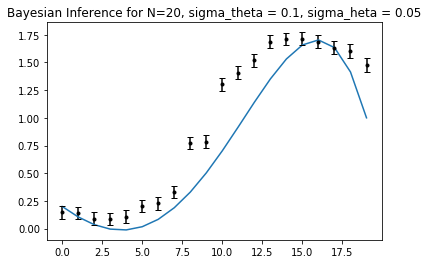

In [28]:
bayesian_inference(0.1, 0.05, theta_prior, 20)

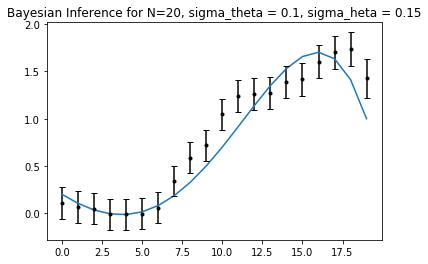

In [29]:
bayesian_inference(0.1, 0.15, theta_prior, 20)

## Problem 1 - Part 5

In [30]:
theta_prior_2 = np.array([-10.54, 0.465, 0.0087, -0.0093, -0.004])

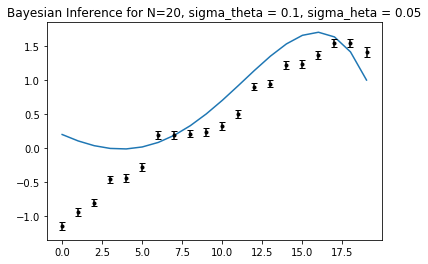

In [31]:
bayesian_inference(0.1, 0.05, theta_prior_2, 20)

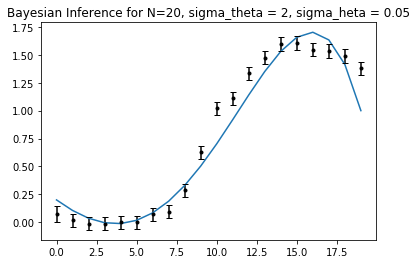

In [32]:
bayesian_inference(2, 0.05, theta_prior_2, 20)

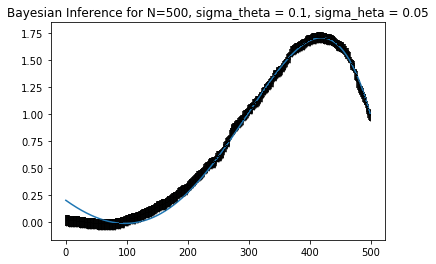

In [33]:
bayesian_inference(0.1, 0.05, theta_prior_2, 500)

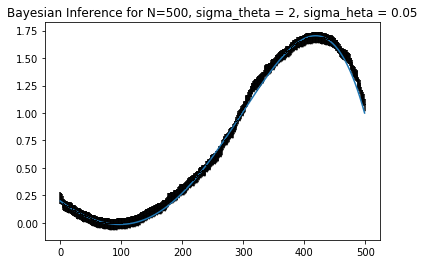

In [34]:
bayesian_inference(2, 0.05, theta_prior_2, 500)

## Problem 1 - Part 6

In [35]:
#np.random.seed(50)
N = 500
sigma_heta = 0.05
phi = np.linspace(start=0.0, stop=2.0, num=N)
PHI = np.array([np.ones(N), phi, phi**2, phi**3, phi**5])
theta_real = np.array([0.2, -1.0, 0.9, 0.7, -0.2])
K = len(theta_real)
I = np.identity(5)
y_real_N = PHI.T @ theta_real
noise = white_noise(N, sigma_heta)
y = y_real_N + noise
a = 1
b = 1

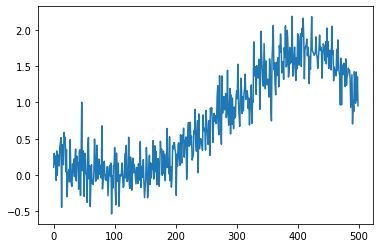

In [36]:
plt.plot(y)

In [37]:
# EM Algorithm
sigma_heta_plot = np.zeros(10)
for i in range(0, 10):
    # E-step
    Sigma_theta = inv(a * I + b * PHI @ PHI.T)
    mu_theta = b * Sigma_theta @ PHI @ y
    A = norm(mu_theta) ** 2 + np.trace(Sigma_theta)
    B = norm(y - PHI.T @ mu_theta) ** 2 + np.trace(PHI.T @ Sigma_theta @ PHI)
    # M-step
    a = K / A
    b = N / B
    sigma_heta_plot[i] = 1 / b

In [38]:
sigma_heta = 1 / b
sigma_theta = 1 / a

In [39]:
x = np.sort(np.random.rand(20) * 2)
X = np.array([np.ones(20), x, x**2, x**3, x**5])

In [40]:
mu_y_predicted = X.T @ mu_theta
sigma_y_predicted = np.diagonal(sigma_heta + sigma_heta * sigma_theta * X.T @
                                inv(sigma_heta * I + sigma_theta * (PHI @ PHI.T)) @ X)

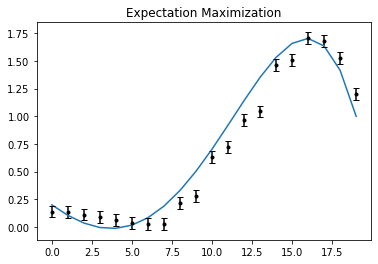

In [41]:
N = 20
phi = np.linspace(start=0.0, stop=2.0, num=N)
PHI = np.array([np.ones(N), phi, phi**2, phi**3, phi**5])
y_real_N = PHI.T @ theta_real

plt.plot(y_real_N, markersize=0.5)
plt.errorbar(range(0, 20), mu_y_predicted, yerr=sigma_y_predicted, fmt='.k', capsize=3)
plt.title('Expectation Maximization algorithm')
plt.show()

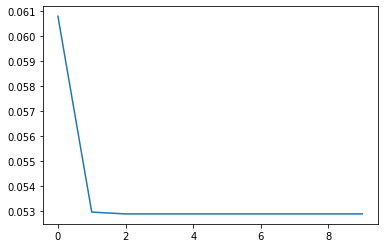

In [42]:
plt.plot(sigma_heta_plot)